In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Telco_data = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
Telco_data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Initialising the target variable(y) inorder not to alter it

In [6]:
y = Telco_data['Churn']

In [7]:
y.isnull().sum().sum()

0

In [8]:
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


EDA and Descriptive analysis of the dataset

In [9]:
Telco_data.shape

(7043, 21)

In [10]:
Telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
Telco_data.dtypes.value_counts()

,count
object,18
int64,2
float64,1


In [12]:
Telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
Telco_data.isnull().sum().sum()

0

I droped the values with the highest cardinality in terms of the most number of unique items

In [14]:
Telco_data_copy = Telco_data.drop(['Churn', 'customerID','TotalCharges'], axis = 1).copy()

In [15]:
Telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


Figuring out the numerical features and the categorical features

In [16]:
cat_cols = Telco_data_copy.select_dtypes(include='object').columns
num_cols = Telco_data_copy.select_dtypes(exclude='object').columns
cat_cols, num_cols

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'))

Data Visualisation for the Categorical features(columns)
Pie charts and countplots were used

In [17]:
def plot_categorical_data(dataframe):
  number_cols = len(cat_cols)
  fig, axes = plt.subplots(nrows = number_cols, ncols = 2, figsize =  (10,3*  len(num_cols)))

  for i, col in enumerate(cat_cols):
    value_counts = dataframe[col].value_counts()
    axes[i, 0].pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%')
    axes[i, 0].set_title(f'Distribution of {col}')

    sns.countplot(data = dataframe, x = col, ax = axes[i, 1])
    axes[i, 0].set_title(f'Count Plot of {col}')

  plt.tight_layout()
  plt.show()

  return dataframe



<ipython-input-17-4e5e9263a425>:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


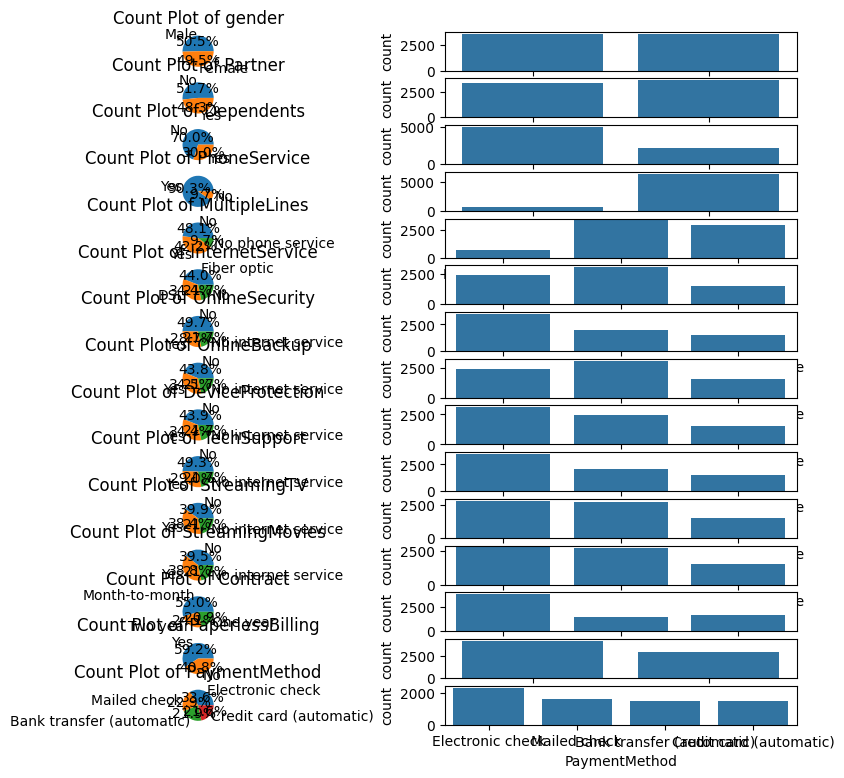

In [18]:
Telco_data_copy = plot_categorical_data(Telco_data_copy)

Correlation matrix for the numerical data

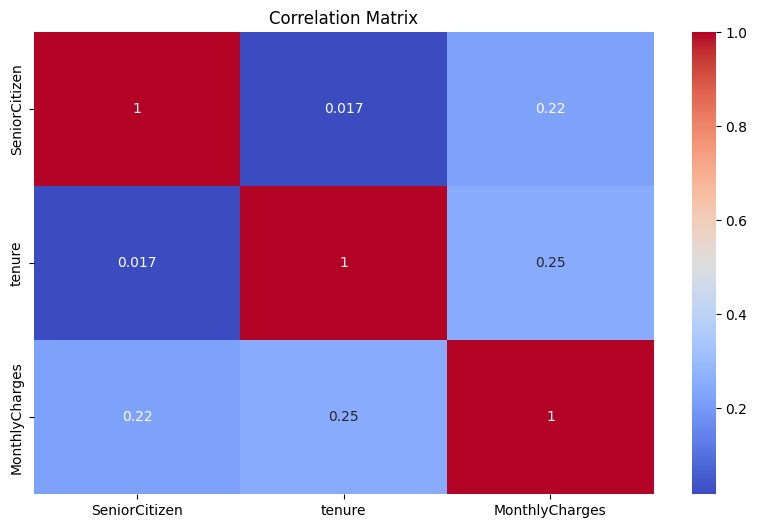

In [19]:
correlation_matrix = Telco_data.corr(numeric_only = True)
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering to add more features  to thedataset inorder to imporve its training and testing accuaracy

In [20]:
Telco_data_copy['PaperlessAndElectronicPayment'] = (Telco_data_copy['PaperlessBilling'] == 'Yes') & (Telco_data_copy['PaymentMethod'].isin(['Electronic check', 'Mailed check']))
Telco_data_copy['TechSupportUser'] = (Telco_data_copy['TechSupport'] == 'Yes').astype(int)
Telco_data_copy['StreamingEngagement'] = (Telco_data_copy['StreamingTV'] == 'Yes').astype(int) + (Telco_data_copy['StreamingMovies'] == 'Yes').astype(int)
Telco_data_copy['HasMultipleLinesAndStreaming'] = (Telco_data_copy['MultipleLines'] == 'Yes') & ((Telco_data_copy['StreamingTV'] == 'Yes') | (Telco_data_copy['StreamingMovies'] == 'Yes'))
Telco_data_copy['HasOnlineSecurityAndBackup'] = (Telco_data_copy['OnlineSecurity'] == 'Yes') & (Telco_data_copy['OnlineBackup'] == 'Yes')


 Encoding for the categorical features and finding the cardinality of the features in the dataset

In [21]:
# Initialize OneHotEncoder with a prefix for clarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Perform one-hot encoding on categorical columns

# Check unique values count for each categorical column
for col in cat_cols:
    print(f"{col}: {Telco_data_copy[col].nunique()} unique values")

# Drop or encode differently high cardinality columns
high_cardinality_cols = [col for col in cat_cols if Telco_data_copy[col].nunique() > 15] # Define a threshold
cat_cols = [col for col in cat_cols if col not in high_cardinality_cols]



gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values


In [22]:
# Perform one-hot encoding on remaining categorical columns
Telco_data_encoded = pd.get_dummies(Telco_data_copy, columns=cat_cols)
Telco_data_encoded

,SeniorCitizen,tenure,MonthlyCharges,PaperlessAndElectronicPayment,TechSupportUser,StreamingEngagement,HasMultipleLinesAndStreaming,HasOnlineSecurityAndBackup,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,False,0,0,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,True,0,0,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,False,1,0,False,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,True,1,2,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,False,0,2,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,True,0,0,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


Scaling for the numerical features

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns (assuming 'num_cols' is already defined)
numerical_data = Telco_data_encoded[num_cols]

# Fit and transform the numerical data
Telco_data_encoded[num_cols] = scaler.fit_transform(Telco_data_encoded[num_cols])


In [25]:
print(Telco_data_copy.dtypes)



gender                            object
SeniorCitizen                      int64
Partner                           object
Dependents                        object
tenure                             int64
PhoneService                      object
MultipleLines                     object
InternetService                   object
OnlineSecurity                    object
OnlineBackup                      object
DeviceProtection                  object
TechSupport                       object
StreamingTV                       object
StreamingMovies                   object
Contract                          object
PaperlessBilling                  object
PaymentMethod                     object
MonthlyCharges                   float64
PaperlessAndElectronicPayment       bool
TechSupportUser                    int64
StreamingEngagement                int64
HasMultipleLinesAndStreaming        bool
HasOnlineSecurityAndBackup          bool
dtype: object


Splitting the data into training and test sets

In [26]:
from sklearn.model_selection import train_test_split

X = Telco_data_encoded

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

Label_Encoding for the y (target variable)

In [27]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [28]:
print(Telco_data_encoded.dtypes)


SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
PaperlessAndElectronicPayment                 bool
TechSupportUser                              int64
StreamingEngagement                          int64
HasMultipleLinesAndStreaming                  bool
HasOnlineSecurityAndBackup                    bool
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL            

Customer segmentationusing KMeans Clustering

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, random_state=  42)
kmeans.fit(Telco_data_encoded)
#Adding cluster labels to the original dataset
Telco_data_copy['clusters'] = kmeans.labels_
#Adding a new column to the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
print(X_train.dtypes)

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
PaperlessAndElectronicPayment                 bool
TechSupportUser                              int64
StreamingEngagement                          int64
HasMultipleLinesAndStreaming                  bool
HasOnlineSecurityAndBackup                    bool
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL            

In [31]:
Telco_data_encoded = pd.DataFrame(Telco_data_encoded)

Converting the boolean values to intergers in the encoded dataset ready for modelling

In [32]:

bool_cols = Telco_data_encoded.select_dtypes(include='bool').columns
Telco_data_encoded[bool_cols] = Telco_data_encoded[bool_cols].astype(int)



Training the model using Linear Regression

In [33]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

Testing the modekl based on the predictions it made

In [34]:
y_pred = logistic_model.predict(X_test)

In [35]:
predictions_df = pd.DataFrame({'Predictions': y_pred})
predictions_df.to_csv('Telco_data_encoded_predictions.csv', index = False)

Different types of the Accuacy metrics used for the linear regreesion model

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, pos_label=1)
recall = recall_score(y_test_encoded, y_pred, pos_label=1)
f1 = f1_score(y_test_encoded, y_pred, pos_label=1)
auc = roc_auc_score(y_test_encoded, logistic_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test_encoded, y_pred)



In [37]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8112
Precision: 0.6858
Recall: 0.5627
F1 Score: 0.6182
AUC: 0.8557
Confusion Matrix:
[[1391  148]
 [ 251  323]]


Confusion Matrix based on the models predictions

Text(0.5, 1.0, 'CONFUSION MATRIX')

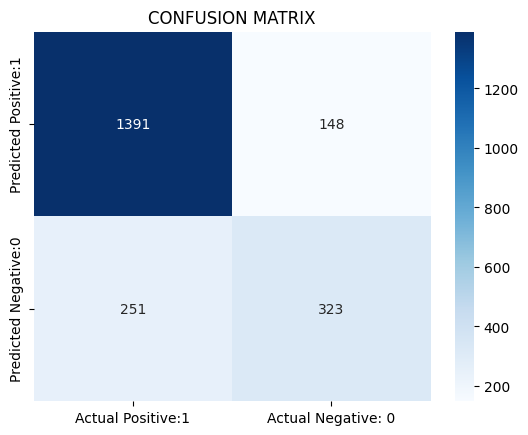

In [38]:
conf_matrix= pd.DataFrame(data = conf_matrix, columns = ['Actual Positive:1', 'Actual Negative: 0'], index = ['Predicted Positive:1', 'Predicted Negative:0'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('CONFUSION MATRIX')

Using SHAP to interpret the models predictions

In [39]:
pip install SHAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.9 MB/s eta 0:00:00


In [40]:
Telco_data_encoded.dtypes

,0
SeniorCitizen,float64
tenure,float64
MonthlyCharges,float64
PaperlessAndElectronicPayment,int64
TechSupportUser,int64
StreamingEngagement,int64
HasMultipleLinesAndStreaming,int64
HasOnlineSecurityAndBackup,int64
gender_Female,int64
gender_Male,int64


Calculation of the SHAP values

In [41]:
import shap
explainer = shap.Explainer(logistic_model, Telco_data_encoded)
shap_values = explainer(Telco_data_encoded)

In [42]:
shap_values_array = np.array(shap_values.values)
shap_values_array

array([[-0.03148815,  0.98811481,  0.06545731, ...,  0.0160016 ,
         0.1216862 ,  0.02404723],
       [-0.03148815, -0.04345079,  0.00814529, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       [-0.03148815,  0.95685524,  0.01470127, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       ...,
       [-0.03148815,  0.67551917,  0.06598602, ...,  0.0160016 ,
         0.1216862 ,  0.02404723],
       [ 0.16531281,  0.89433612, -0.02875858, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       [-0.03148815, -1.04375683, -0.09484717, ...,  0.0160016 ,
        -0.06552334,  0.02404723]])

In [43]:
shap_values_array = shap_values_array.astype(np.float64)

In [44]:
Shap_values_df = pd.DataFrame(shap_values_array)
Shap_values_df.to_csv('Shap_values_df.csv', index = False)

Plotting the shap values with a summary plot to figure out which feaures impacted mostly on the models prediction

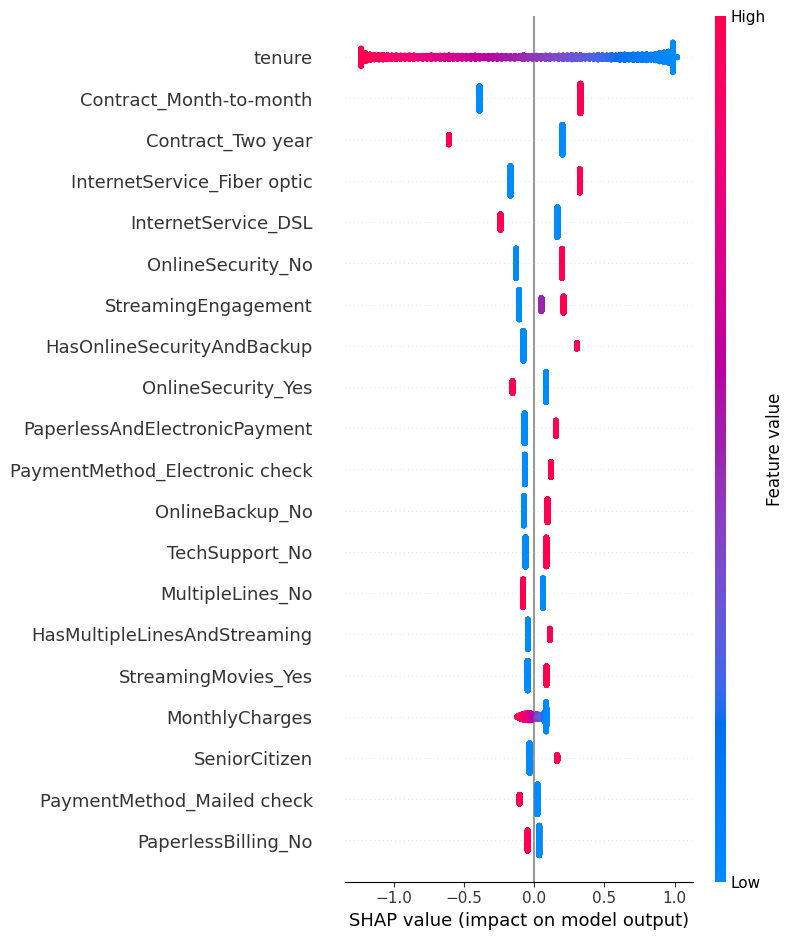

In [45]:
shap.summary_plot(shap_values_array, Telco_data_encoded, feature_names = X.columns)
#

Also used a force plot to esssentially do the same function above

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_array[0], Telco_data_encoded.iloc[0], feature_names=X.columns)

Utilised a dependence plot to understand what feature simpacted the models predictions

In [47]:
def dependence_plot(shap_values_array, Telco_data_encoded, interaction_index=None):
  for col in Telco_data_encoded.columns:
    shap.dependence_plot(col, shap_values_array,Telco_data_encoded, interaction_index=None, dot_size=100, show = False)
    plt.show()

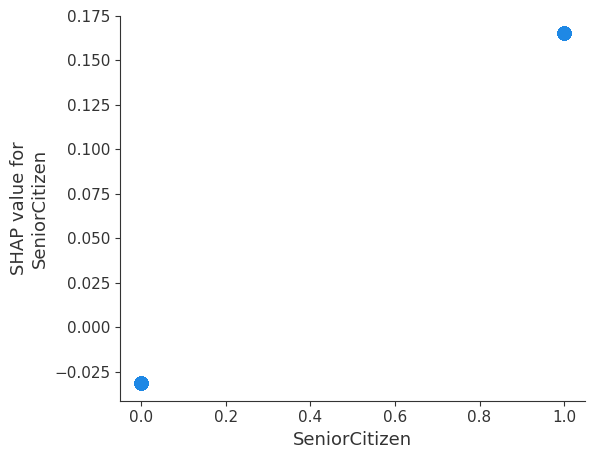

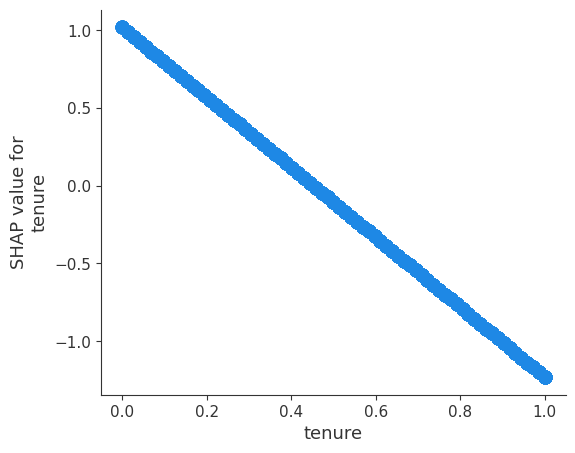

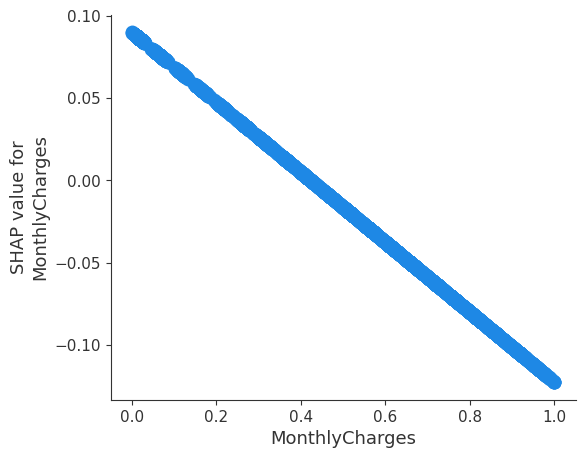

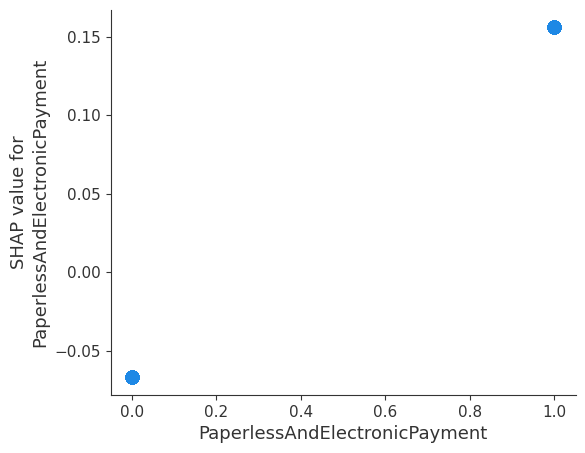

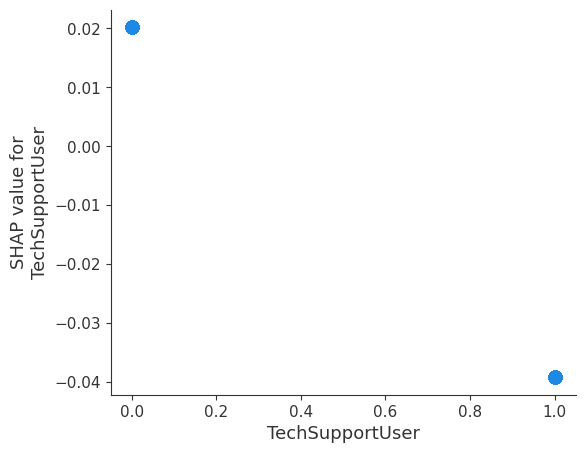

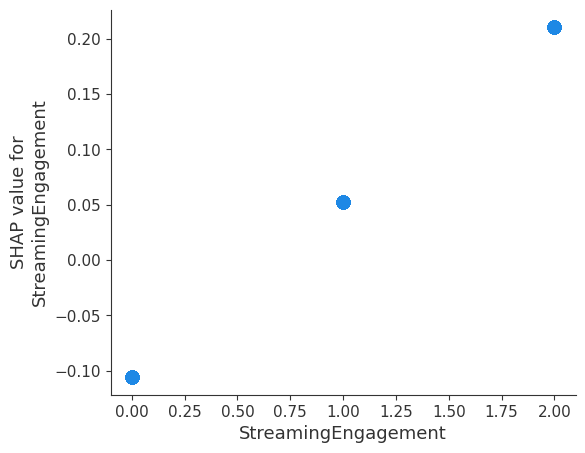

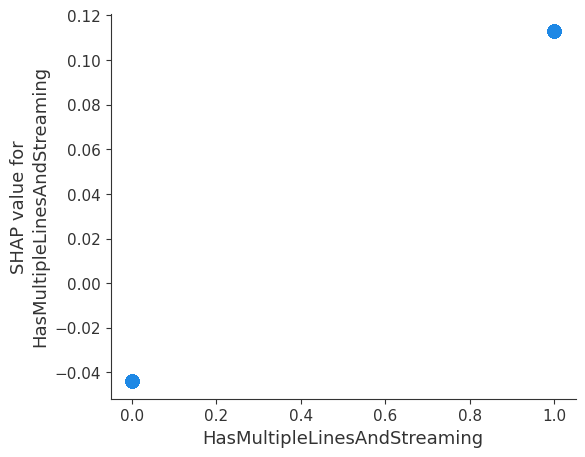

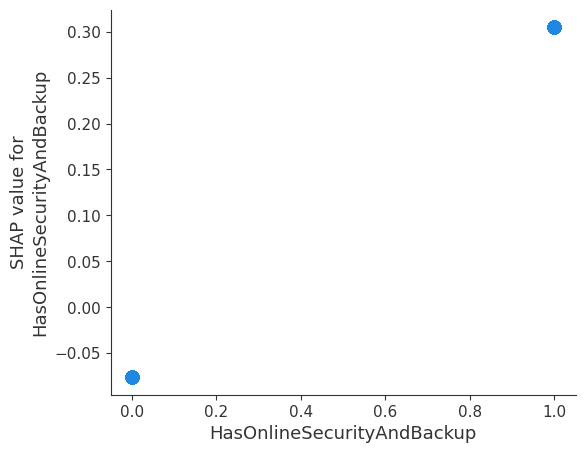

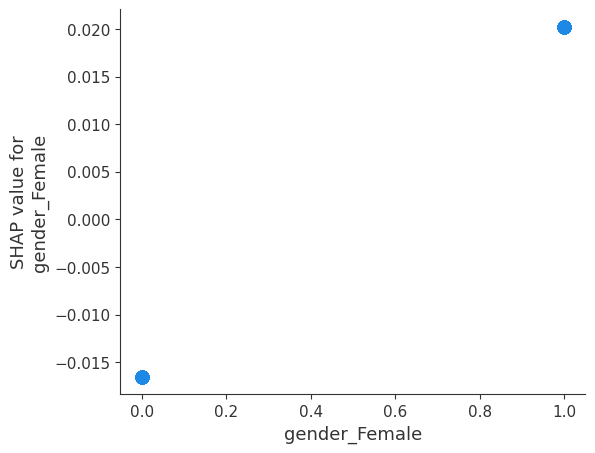

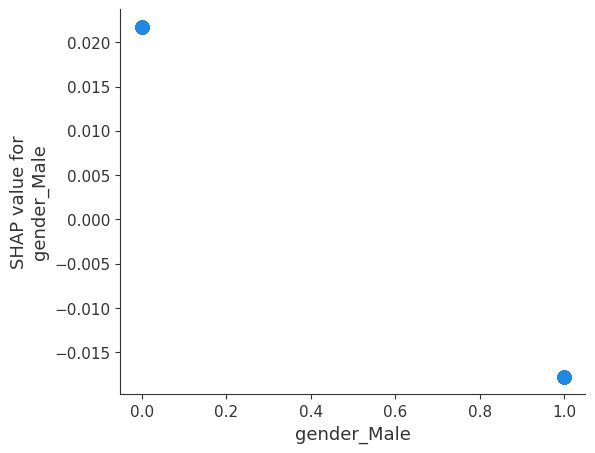

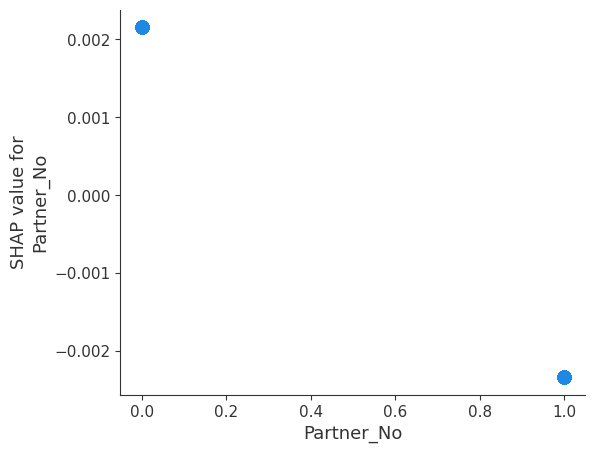

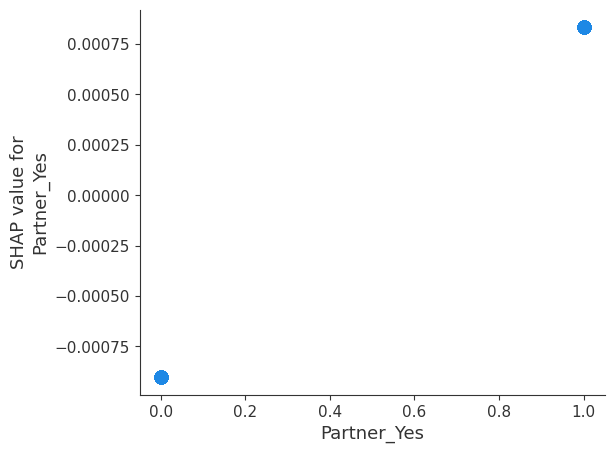

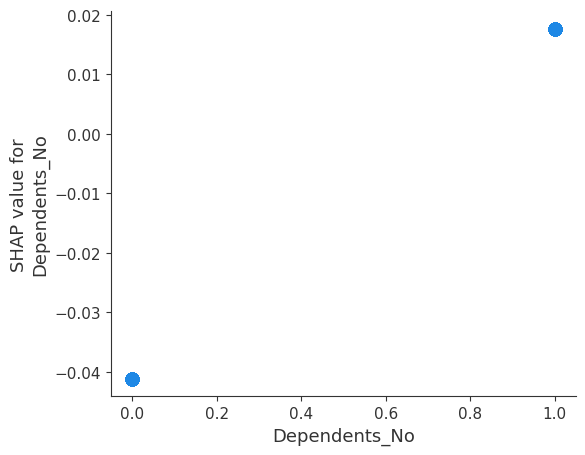

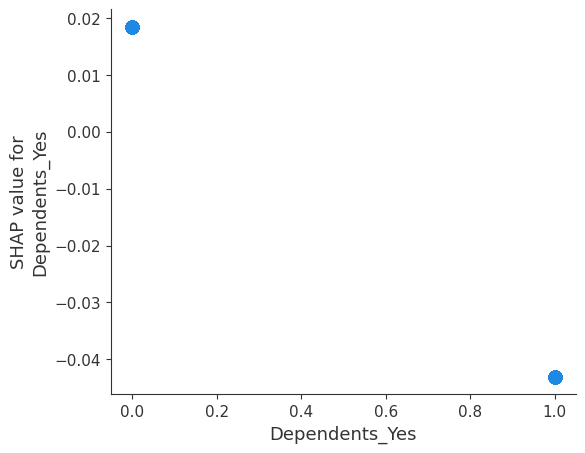

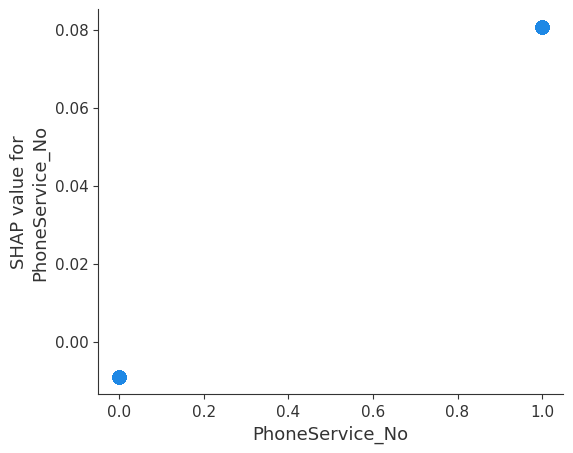

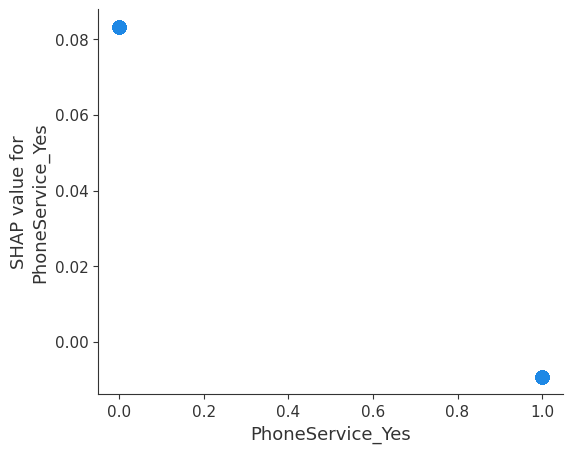

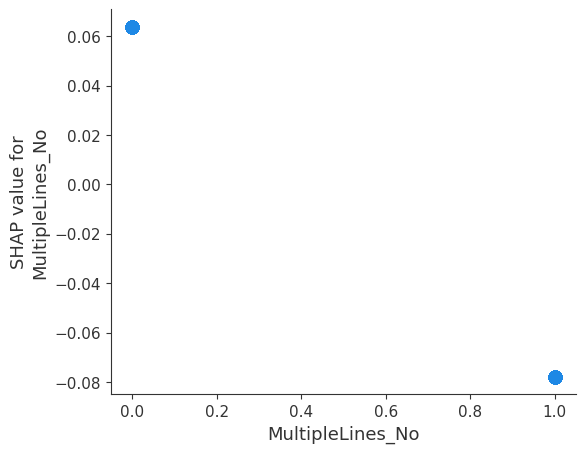

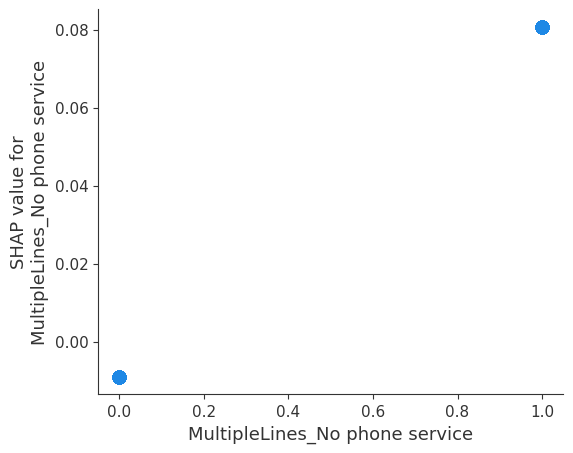

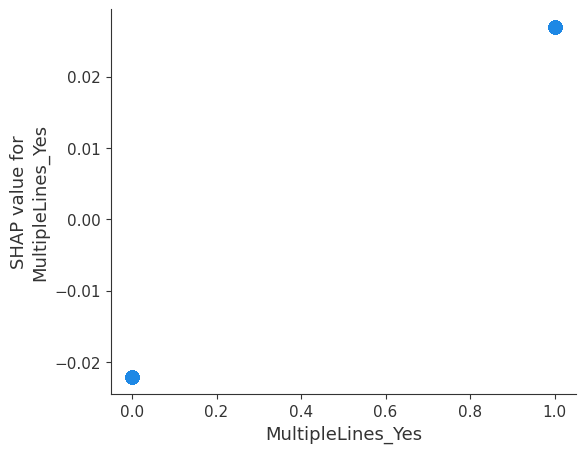

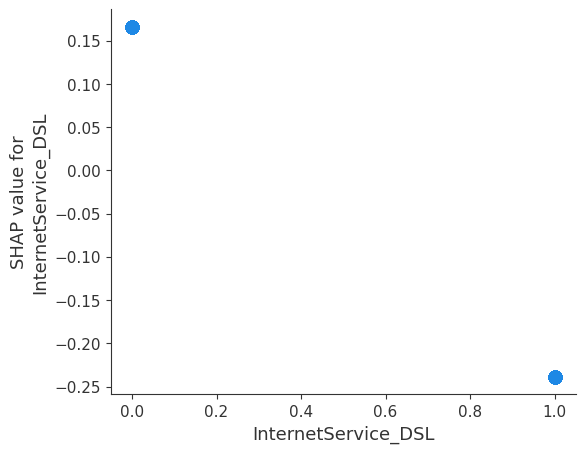

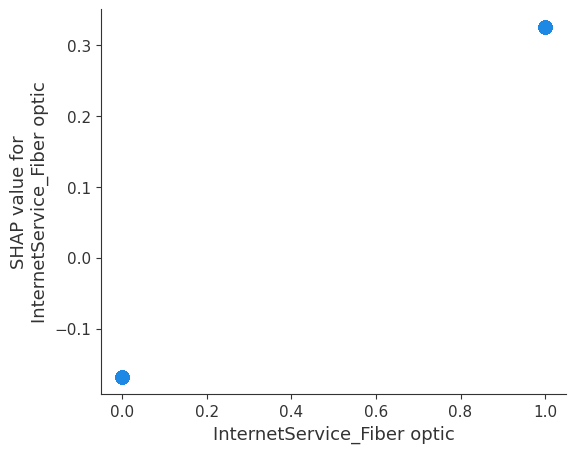

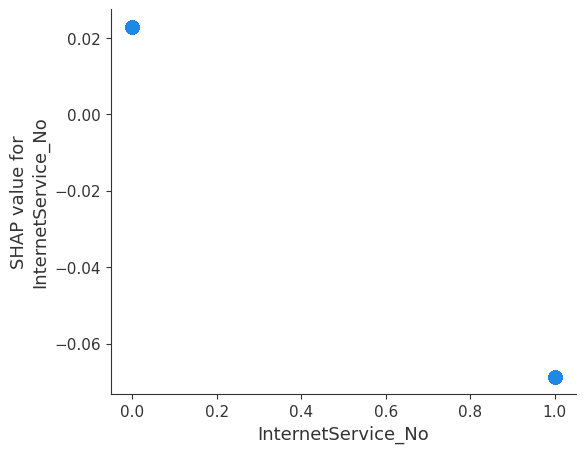

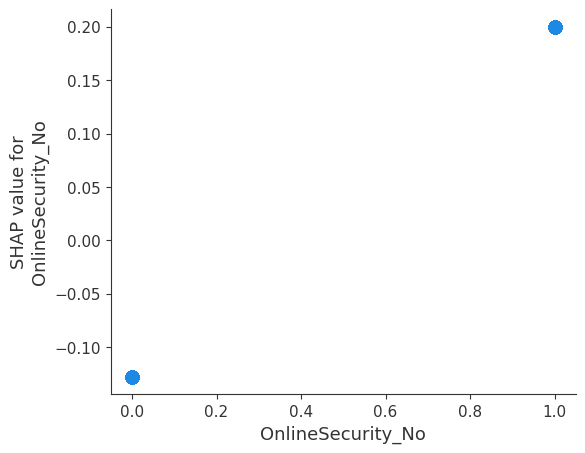

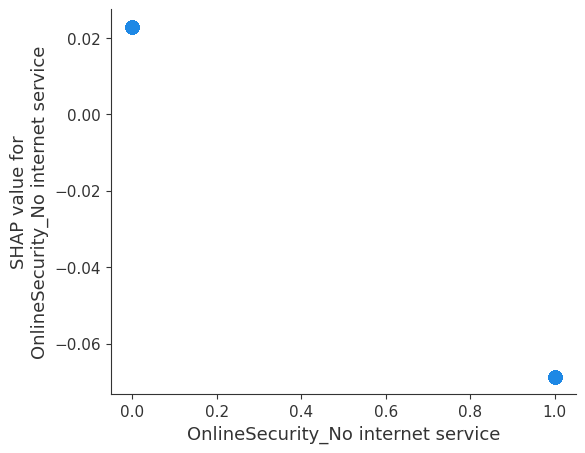

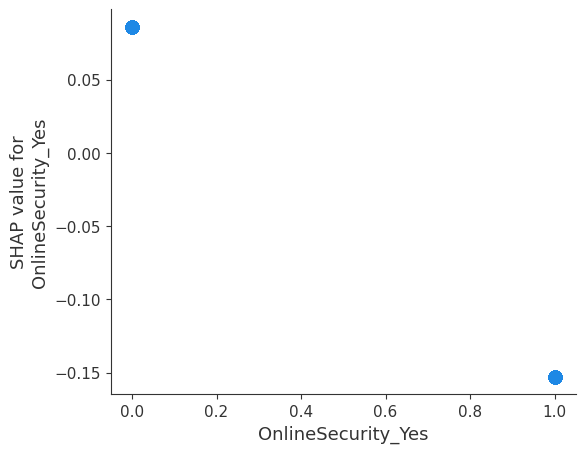

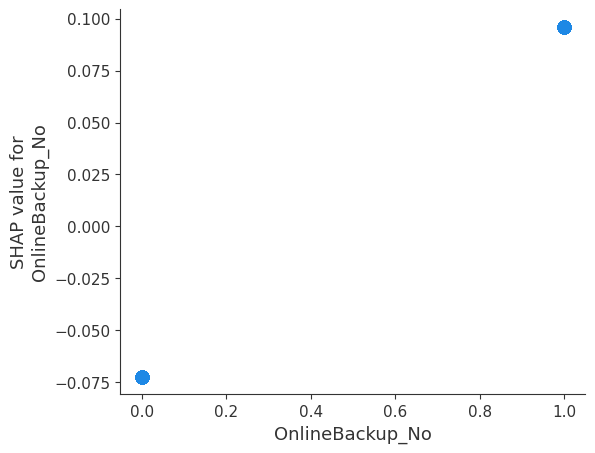

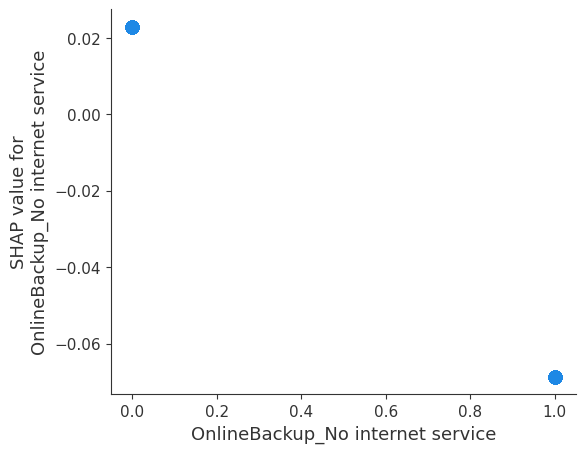

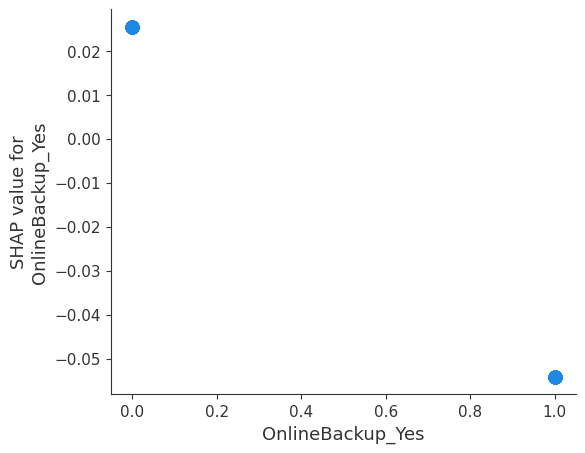

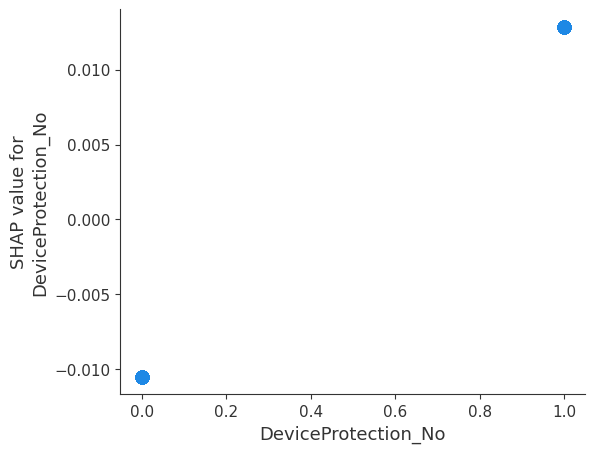

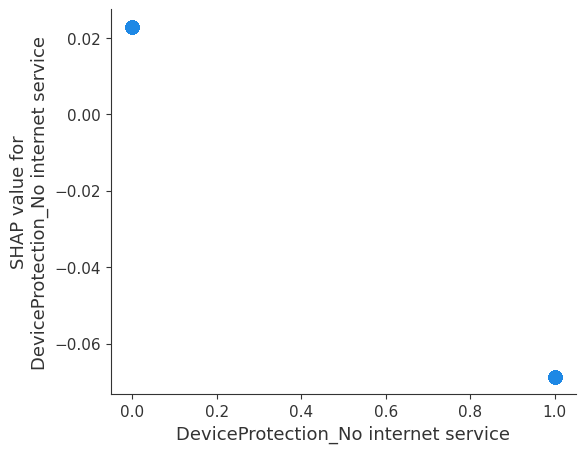

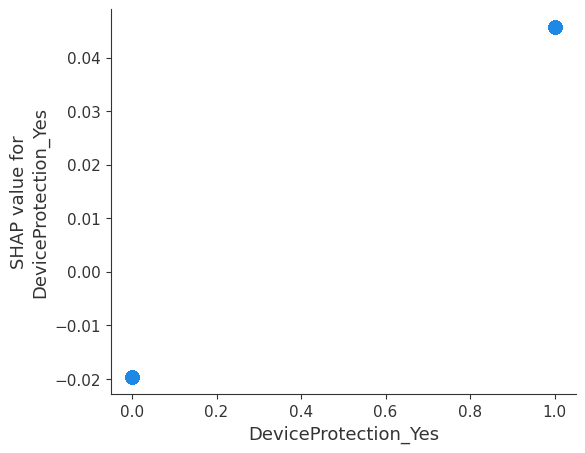

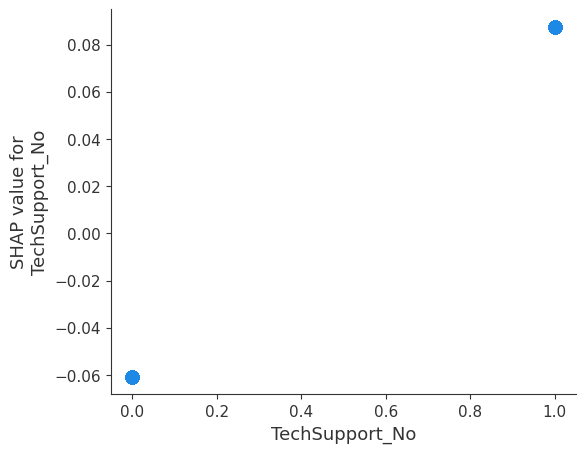

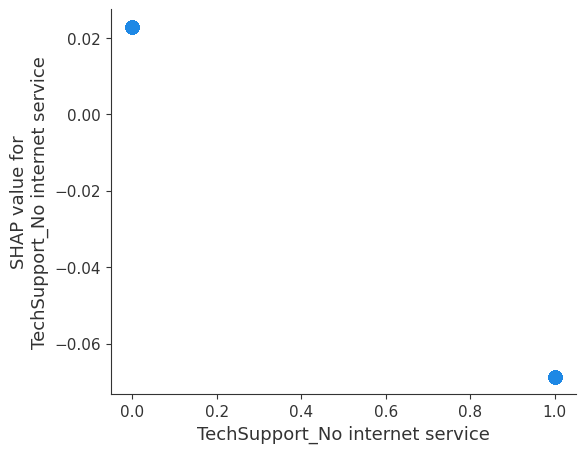

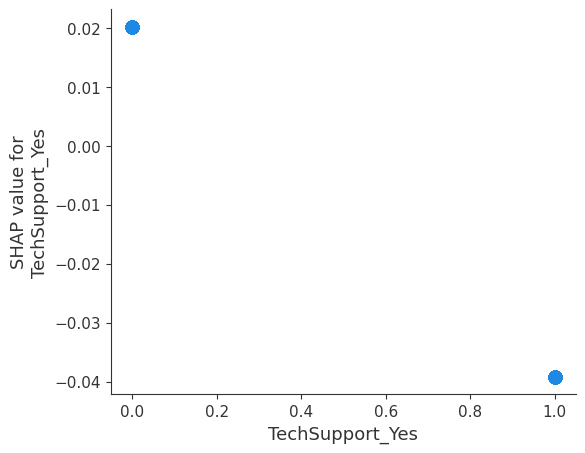

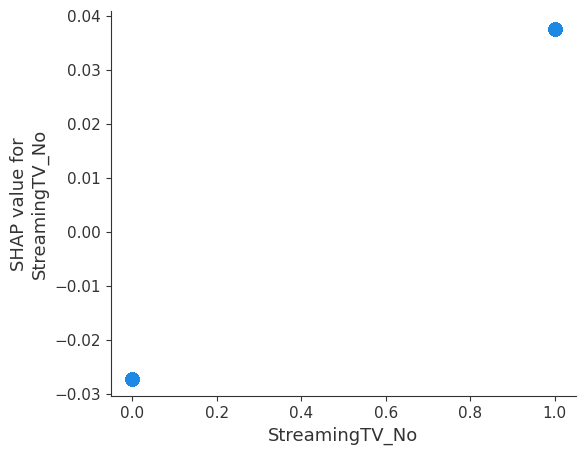

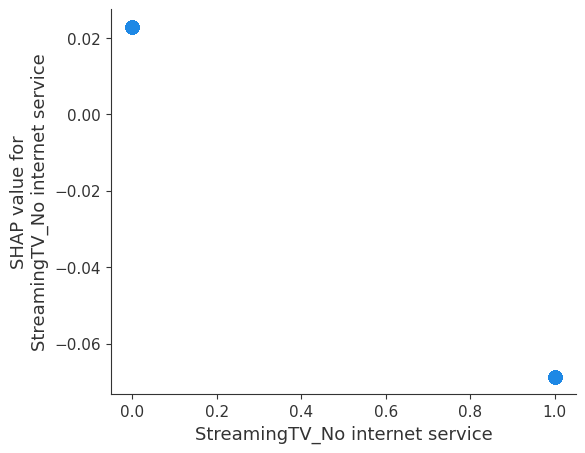

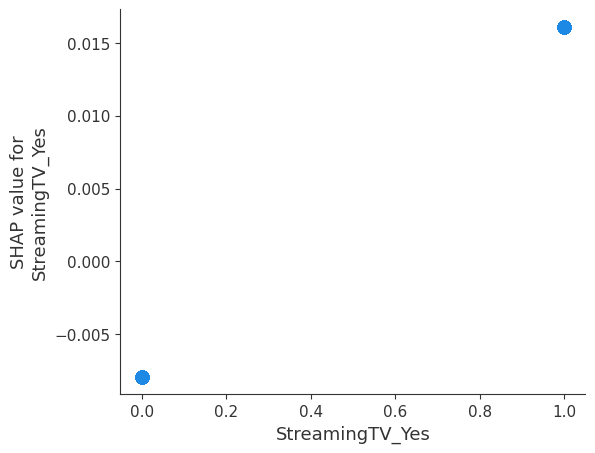

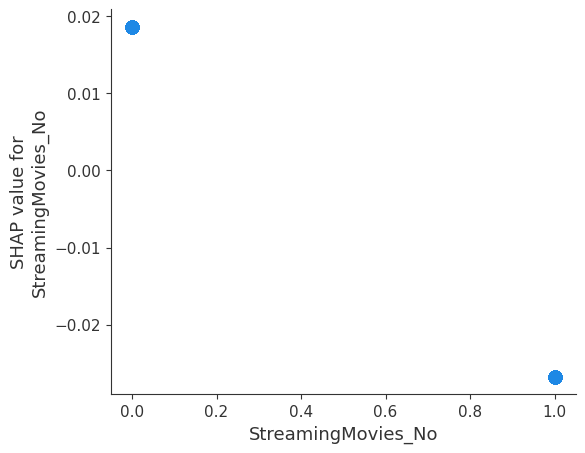

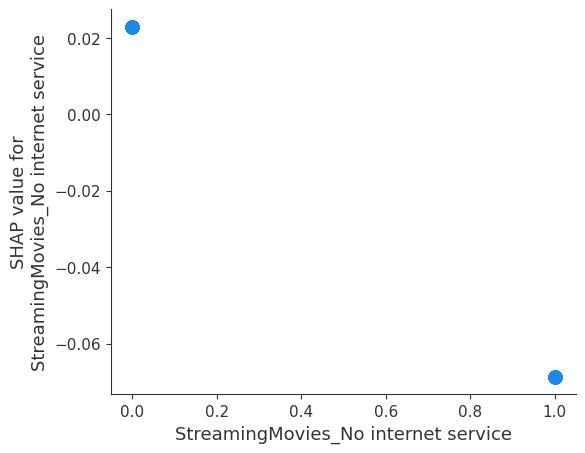

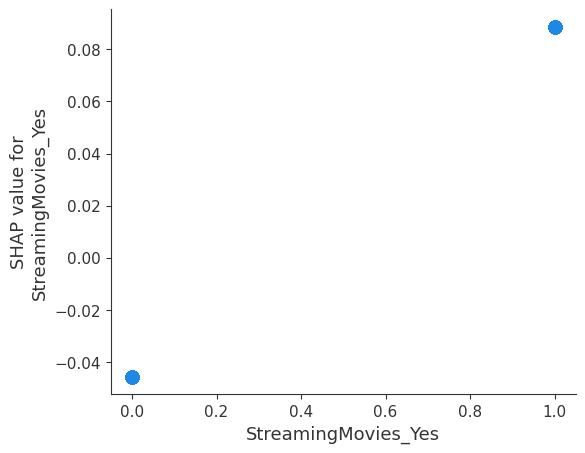

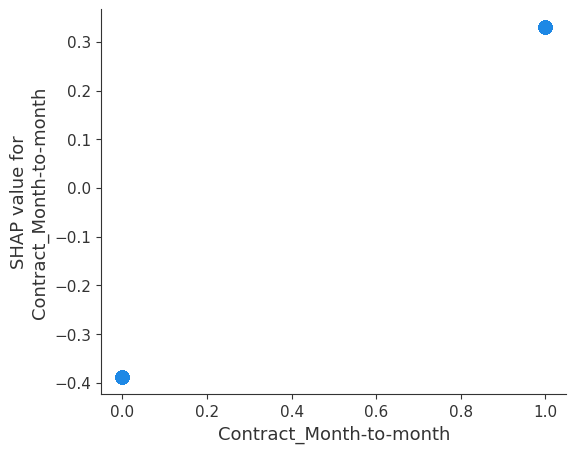

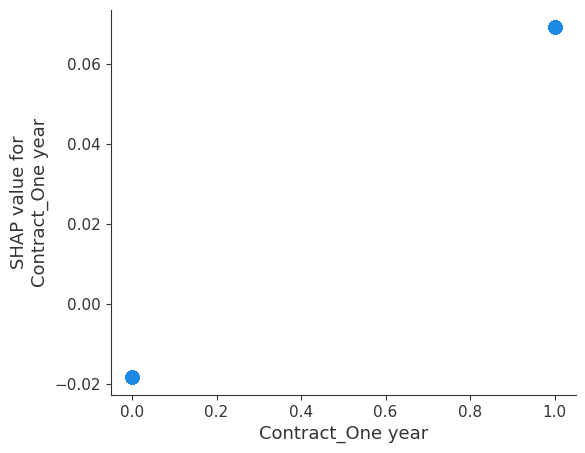

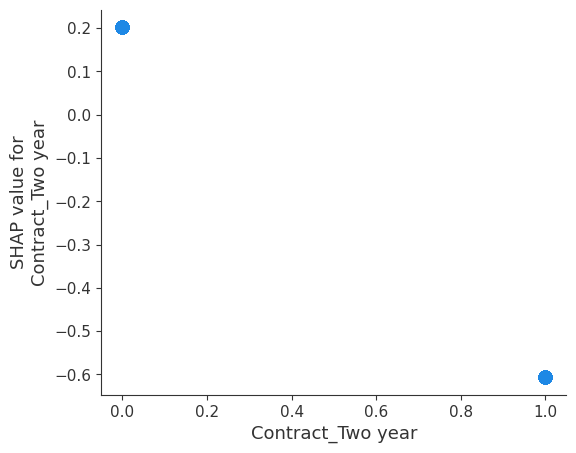

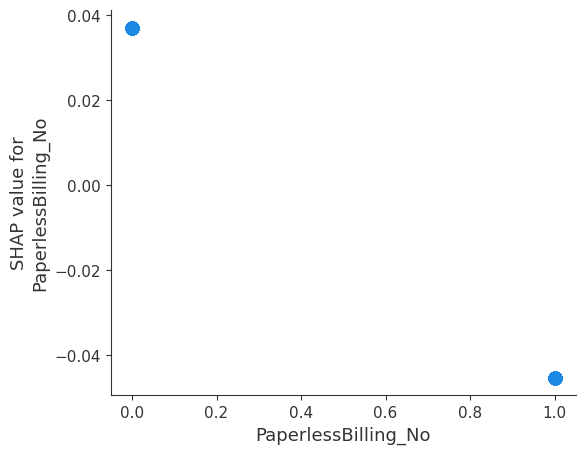

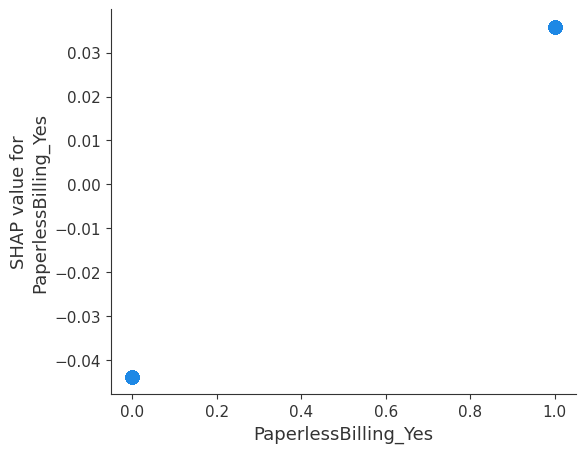

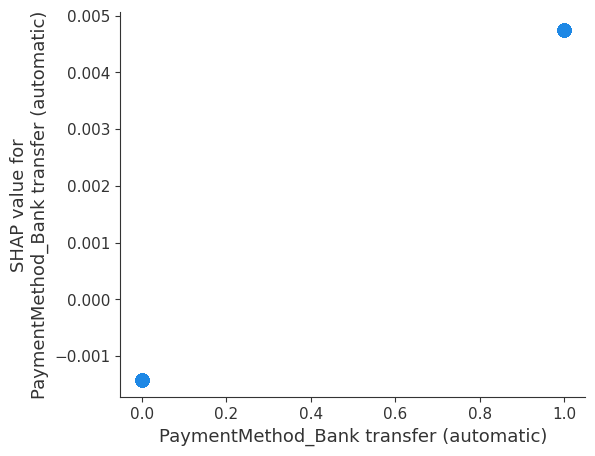

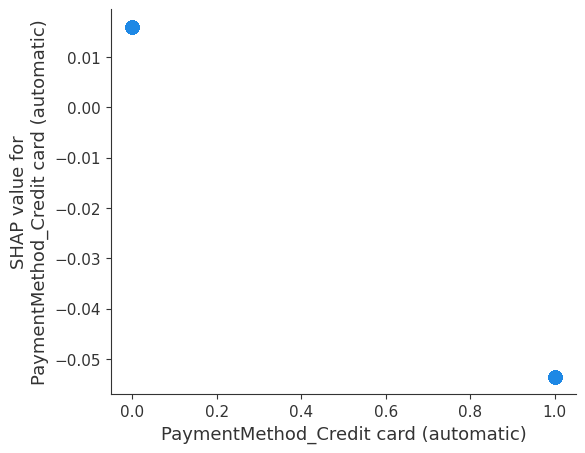

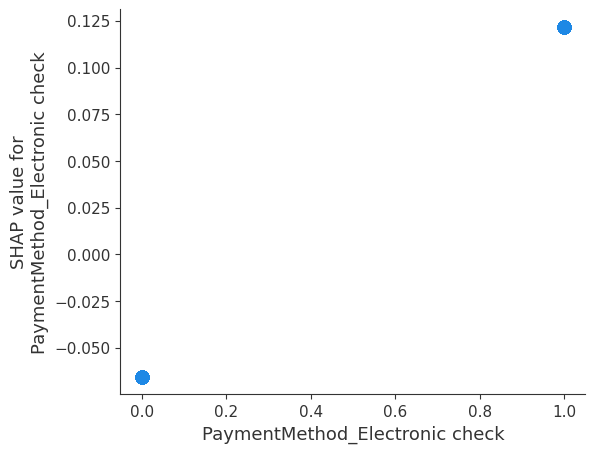

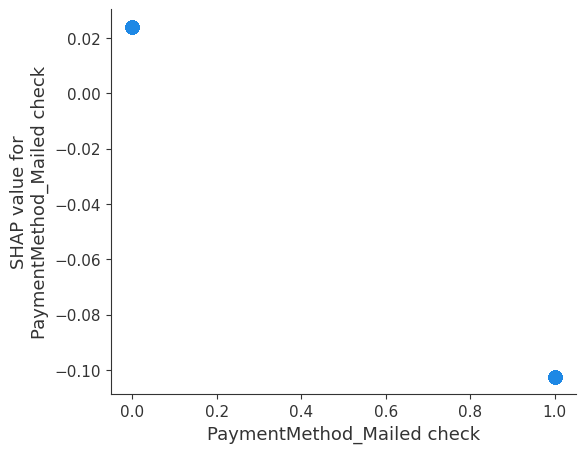

In [48]:
dependence_plot(shap_values_array, Telco_data_encoded)